In [159]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt


In [160]:
file_path = "/Users/mayurimamdi/Documents/IrelandHousingPredictiion/Data/Housing_Data_Jan2010_to_May2023_Cleaned.csv"

In [161]:
df=pd.read_csv(file_path, encoding="latin1")

In [162]:
df.head()

,Date,Address,County,Price,Full_Market_Price,VAT_Exclusive,Description_of_Property,Property_Size_Description
0,28/11/2018,"ABBEY GLEN, OFF POTTERY RD, CABINTEELY",Dublin,14800000.0,0.0,0.0,Second-Hand Dwelling house /Apartment,No Description
1,15/12/2016,"WALFORD, SHREWSBURY RD, DUBLIN 4",Dublin,14250000.0,0.0,0.0,Second-Hand Dwelling house /Apartment,No Description
2,29/03/2013,"Walford, Shrewsbury Road, Dublin 4",Dublin,14000000.0,0.0,0.0,Second-Hand Dwelling house /Apartment,No Description
3,19/05/2021,"Uimhi a Naoi, Bótha Sriúsbaire",Dublin,13250000.0,0.0,0.0,Second-Hand Dwelling house /Apartment,No Description
4,20/11/2019,"Property at Castletown Demesne, Carrick-on-Sui...",Kilkenny,12600000.0,0.0,0.0,Second-Hand Dwelling house /Apartment,No Description


In [163]:
df['Property_Size_Description'].unique()

array(['No Description', 'greater than 125 sq metres',
       'greater than or equal to 38 sq metres and less than 125 sq metres',
       'greater than or equal to 125 sq metres', 'less than 38 sq metres',
       'níos mó ná nó cothrom le 38 méadar cearnach agus níos lú ná 125 méadar cearnach',
       'n?os l? n? 38 m?adar cearnach', nan], dtype=object)

In [164]:
df['Description_of_Property'].unique()

array(['Second-Hand Dwelling house /Apartment',
       'New Dwelling house /Apartment', 'Teach/Árasán Cónaithe Atháimhe',
       'Teach/Árasán Cónaithe Nua', nan, 'Teach/?ras?n C?naithe Nua'],
      dtype=object)

In [165]:
valid_property_types = [
    'Second-Hand Dwelling house /Apartment',
    'New Dwelling house /Apartment'
]

df = df[df['Description_of_Property'].isin(valid_property_types)]


In [166]:
valid_area_desc = [
    'No Description',
    'less than 38 sq metres',
    'greater than or equal to 38 sq metres and less than 125 sq metres',
    'greater than or equal to 125 sq metres',
    'greater than 125 sq metres'
]

df = df[df['Property_Size_Description'].isin(valid_area_desc)]


In [167]:
df['Description_of_Property'].unique()

array(['Second-Hand Dwelling house /Apartment',
       'New Dwelling house /Apartment'], dtype=object)

In [168]:
df['Property_Size_Description'].unique()


array(['No Description', 'greater than 125 sq metres',
       'greater than or equal to 38 sq metres and less than 125 sq metres',
       'greater than or equal to 125 sq metres', 'less than 38 sq metres'],
      dtype=object)

In [169]:
df['VAT_Exclusive'].unique()

array([0., 1.])

In [170]:
df['VAT_Exclusive']=df['VAT_Exclusive'].astype(int)

In [171]:
df['VAT_Exclusive'].unique()

array([0, 1])

In [172]:
df['County'].unique()

array(['Dublin', 'Kilkenny', 'Laois', 'Cork', 'Wicklow', 'Louth',
       'Kildare', 'Limerick', 'Tipperary', 'Clare', 'Meath', 'Galway',
       'Wexford', 'Cavan', 'Kerry', 'Carlow', 'Westmeath', 'Waterford',
       'Sligo', 'Donegal', 'Mayo', 'Longford', 'Monaghan', 'Roscommon',
       'Leitrim', 'Offaly'], dtype=object)

In [173]:
df['day']=df['Date'].str.split('/').str[0]

In [174]:
df['day'].head()

0    28
1    15
2    29
3    19
4    20
Name: day, dtype: object

In [175]:
df['month']=df['Date'].str.split('/').str[1]

In [176]:
df['month'].head()

0    11
1    12
2    03
3    05
4    11
Name: month, dtype: object

In [177]:
df['Date'].str.split('/').str[2]

0         2018
1         2016
2         2013
3         2021
4         2019
          ... 
596650    2018
596651    2014
596652    2012
596653    2019
596654    2023
Name: Date, Length: 596605, dtype: object

In [178]:
df['year']=df['Date'].str.split('/').str[2]

In [179]:
df['year'].head()

0    2018
1    2016
2    2013
3    2021
4    2019
Name: year, dtype: object

In [180]:
df.drop(columns='Date', axis=1, inplace=True)

In [181]:
df.head()

,Address,County,Price,Full_Market_Price,VAT_Exclusive,Description_of_Property,Property_Size_Description,day,month,year
0,"ABBEY GLEN, OFF POTTERY RD, CABINTEELY",Dublin,14800000.0,0.0,0,Second-Hand Dwelling house /Apartment,No Description,28,11,2018
1,"WALFORD, SHREWSBURY RD, DUBLIN 4",Dublin,14250000.0,0.0,0,Second-Hand Dwelling house /Apartment,No Description,15,12,2016
2,"Walford, Shrewsbury Road, Dublin 4",Dublin,14000000.0,0.0,0,Second-Hand Dwelling house /Apartment,No Description,29,03,2013
3,"Uimhi a Naoi, Bótha Sriúsbaire",Dublin,13250000.0,0.0,0,Second-Hand Dwelling house /Apartment,No Description,19,05,2021
4,"Property at Castletown Demesne, Carrick-on-Sui...",Kilkenny,12600000.0,0.0,0,Second-Hand Dwelling house /Apartment,No Description,20,11,2019


In [182]:
df['Full_Market_Price'].value_counts()

Full_Market_Price
0.0    567828
1.0     28777
Name: count, dtype: int64

In [183]:
df['Full_Market_Price']=df['Full_Market_Price'].astype(int)

In [184]:
df.head()

,Address,County,Price,Full_Market_Price,VAT_Exclusive,Description_of_Property,Property_Size_Description,day,month,year
0,"ABBEY GLEN, OFF POTTERY RD, CABINTEELY",Dublin,14800000.0,0,0,Second-Hand Dwelling house /Apartment,No Description,28,11,2018
1,"WALFORD, SHREWSBURY RD, DUBLIN 4",Dublin,14250000.0,0,0,Second-Hand Dwelling house /Apartment,No Description,15,12,2016
2,"Walford, Shrewsbury Road, Dublin 4",Dublin,14000000.0,0,0,Second-Hand Dwelling house /Apartment,No Description,29,03,2013
3,"Uimhi a Naoi, Bótha Sriúsbaire",Dublin,13250000.0,0,0,Second-Hand Dwelling house /Apartment,No Description,19,05,2021
4,"Property at Castletown Demesne, Carrick-on-Sui...",Kilkenny,12600000.0,0,0,Second-Hand Dwelling house /Apartment,No Description,20,11,2019


In [185]:
df['Price'].value_counts()

Price
150000.00    7475
100000.00    6759
200000.00    6702
250000.00    5998
120000.00    5818
             ... 
277532.31       1
277532.73       1
277532.74       1
277532.81       1
5001.00         1
Name: count, Length: 34662, dtype: int64

In [186]:
df['County'].value_counts()

County
Dublin       187611
Cork          65144
Kildare       31565
Galway        29594
Meath         24348
Limerick      22182
Wexford       20781
Wicklow       19095
Kerry         17077
Waterford     16326
Donegal       16310
Louth         16155
Tipperary     16105
Mayo          14377
Clare         13647
Westmeath     11470
Kilkenny       9347
Laois          9341
Cavan          9129
Sligo          8942
Roscommon      8658
Offaly         7442
Carlow         6634
Leitrim        5398
Longford       5196
Monaghan       4731
Name: count, dtype: int64

In [187]:
df['Description_of_Property'].unique()

array(['Second-Hand Dwelling house /Apartment',
       'New Dwelling house /Apartment'], dtype=object)

In [188]:
df['Description_of_Property']=df['Description_of_Property'].map({'Second-Hand Dwelling house /Apartment':0, 'New Dwelling house /Apartment':1})

In [189]:
df.head()

,Address,County,Price,Full_Market_Price,VAT_Exclusive,Description_of_Property,Property_Size_Description,day,month,year
0,"ABBEY GLEN, OFF POTTERY RD, CABINTEELY",Dublin,14800000.0,0,0,0,No Description,28,11,2018
1,"WALFORD, SHREWSBURY RD, DUBLIN 4",Dublin,14250000.0,0,0,0,No Description,15,12,2016
2,"Walford, Shrewsbury Road, Dublin 4",Dublin,14000000.0,0,0,0,No Description,29,03,2013
3,"Uimhi a Naoi, Bótha Sriúsbaire",Dublin,13250000.0,0,0,0,No Description,19,05,2021
4,"Property at Castletown Demesne, Carrick-on-Sui...",Kilkenny,12600000.0,0,0,0,No Description,20,11,2019


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 596605 entries, 0 to 596654
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Address                    596605 non-null  object 
 1   County                     596605 non-null  object 
 2   Price                      596605 non-null  float64
 3   Full_Market_Price          596605 non-null  int64  
 4   VAT_Exclusive              596605 non-null  int64  
 5   Description_of_Property    596605 non-null  int64  
 6   Property_Size_Description  596605 non-null  object 
 7   day                        596605 non-null  object 
 8   month                      596605 non-null  object 
 9   year                       596605 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 50.1+ MB


In [191]:
df['Property_Size_Description'].unique()

array(['No Description', 'greater than 125 sq metres',
       'greater than or equal to 38 sq metres and less than 125 sq metres',
       'greater than or equal to 125 sq metres', 'less than 38 sq metres'],
      dtype=object)

In [192]:
df['Property_Size_Description']=df['Property_Size_Description'].map({'No Description':0, 
                                                                     'less than 38 sq metres' :1,
                                                                     'greater than or equal to 38 sq metres and less than 125 sq metres':2,
                                                                     'greater than or equal to 125 sq metres':3,
                                                                     'greater than 125 sq metres':4
                                                                    })

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 596605 entries, 0 to 596654
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Address                    596605 non-null  object 
 1   County                     596605 non-null  object 
 2   Price                      596605 non-null  float64
 3   Full_Market_Price          596605 non-null  int64  
 4   VAT_Exclusive              596605 non-null  int64  
 5   Description_of_Property    596605 non-null  int64  
 6   Property_Size_Description  596605 non-null  int64  
 7   day                        596605 non-null  object 
 8   month                      596605 non-null  object 
 9   year                       596605 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 50.1+ MB


In [194]:
df['day']=df['day'].astype(int)
df['month']=df['month'].astype(int)
df['year']=df['year'].astype(int)

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 596605 entries, 0 to 596654
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Address                    596605 non-null  object 
 1   County                     596605 non-null  object 
 2   Price                      596605 non-null  float64
 3   Full_Market_Price          596605 non-null  int64  
 4   VAT_Exclusive              596605 non-null  int64  
 5   Description_of_Property    596605 non-null  int64  
 6   Property_Size_Description  596605 non-null  int64  
 7   day                        596605 non-null  int64  
 8   month                      596605 non-null  int64  
 9   year                       596605 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 50.1+ MB


In [196]:
df['County']

0            Dublin
1            Dublin
2            Dublin
3            Dublin
4          Kilkenny
            ...    
596650    Tipperary
596651      Donegal
596652      Donegal
596653         Cork
596654         Mayo
Name: County, Length: 596605, dtype: object

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 596605 entries, 0 to 596654
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Address                    596605 non-null  object 
 1   County                     596605 non-null  object 
 2   Price                      596605 non-null  float64
 3   Full_Market_Price          596605 non-null  int64  
 4   VAT_Exclusive              596605 non-null  int64  
 5   Description_of_Property    596605 non-null  int64  
 6   Property_Size_Description  596605 non-null  int64  
 7   day                        596605 non-null  int64  
 8   month                      596605 non-null  int64  
 9   year                       596605 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 50.1+ MB


In [198]:
df.duplicated().sum()

np.int64(0)

In [199]:
df.isna().sum()

Address                      0
County                       0
Price                        0
Full_Market_Price            0
VAT_Exclusive                0
Description_of_Property      0
Property_Size_Description    0
day                          0
month                        0
year                         0
dtype: int64

In [200]:
df.duplicated(
    subset=[
        'County',
        'Price',
        'day',
        'month',
        'year',
        'Full_Market_Price',
        'VAT_Exclusive',
        'Description_of_Property',
        'Property_Size_Description'
    ],
    keep=False
).sum()


np.int64(78806)

In [201]:
dup_counts = (
    df.groupby([
        'County',
        'Price',
        'day',
        'month',
        'year',
        'Full_Market_Price',
        'VAT_Exclusive',
        'Description_of_Property',
        'Property_Size_Description'
    ])
    .size()
    .value_counts()
    .sort_index()
)

dup_counts.head(10)


1     517799
2      21749
3       3035
4       1253
5        487
6        416
7        176
8        266
9        128
10       137
Name: count, dtype: int64

In [202]:
dup_mask = df.duplicated(
    subset=[
        'County',
        'Price',
        'day',
        'month',
        'year',
        'Full_Market_Price',
        'VAT_Exclusive',
        'Description_of_Property',
        'Property_Size_Description'
    ],
    keep=False
)


In [203]:
dup_df = df[dup_mask].copy()


In [204]:
dup_df[
    [
        'Address',
        'County',
        'Price',
        'day',
        'month',
        'year'
    ]
].sort_values(
    by=['County', 'Price', 'year', 'month', 'day']
).head(20)


,Address,County,Price,day,month,year
595800,"8 Rivercourt The Dolmen Hotel, Kilkenny Road,...",Carlow,10000.00,9,12,2015
595801,"9 Rivercourt The Dolmen Hotel, Kilkenny Road,...",Carlow,10000.00,9,12,2015
595797,"8 RIVER COURT, THE DOLMEN HOTEL, KILKENNY ROAD",Carlow,10000.00,24,9,2018
595798,"APT.9 - RIVERCOURT, THE DOLMEN HOTEL, CARLOW ROAD",Carlow,10000.00,24,9,2018
594296,"10 Maple Road, Rivercourt",Carlow,15000.00,3,3,2016
594297,"19 Maple Road, Rivercourt",Carlow,15000.00,3,3,2016
594298,"20 Maple Road, Rivercourt",Carlow,15000.00,3,3,2016
594299,"21 Maple Road, Rivercourt",Carlow,15000.00,3,3,2016
594300,"22 Maple Road, Rivercourt",Carlow,15000.00,3,3,2016
594301,"23 Maple Road, Rivercourt",Carlow,15000.00,3,3,2016


In [205]:
df.duplicated(
    subset=[
        'Address',
        'County',
        'Price',
        'day',
        'month',
        'year',
        'Full_Market_Price',
        'VAT_Exclusive',
        'Description_of_Property',
        'Property_Size_Description'
    ]
).sum()


np.int64(0)

EDA

<Axes: xlabel='County', ylabel='Price'>

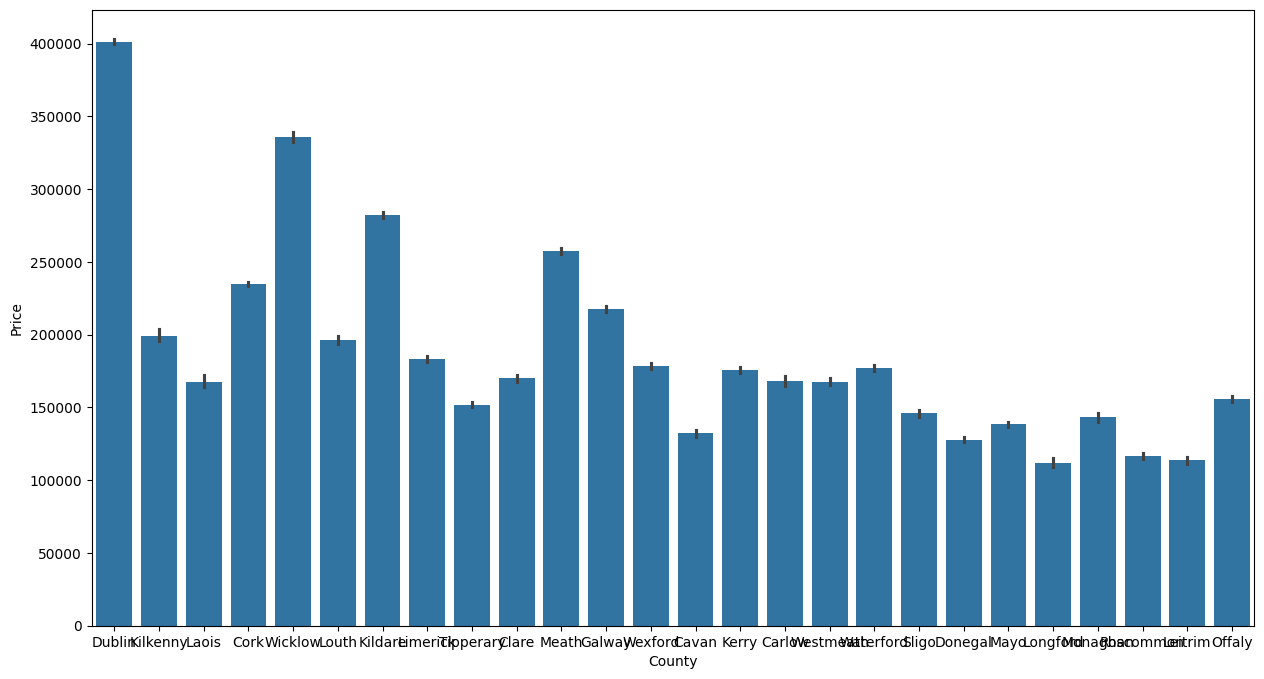

In [221]:
plt.figure(figsize=(15,8))
sns.barplot(x='County',y='Price', data=df)

In [208]:
X = df.drop(columns=['Price'])
y = df['Price']   


In [209]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [210]:
y_train.shape


(477284,)

In [211]:
import category_encoders as ce

te = ce.TargetEncoder(cols=['County'])

X_train['County_te'] = te.fit_transform(
    X_train[['County']], y_train
)

X_test['County_te'] = te.transform(
    X_test[['County']]
)


In [212]:
X_train.drop(columns=['County'], inplace=True)
X_test.drop(columns=['County'], inplace=True)


In [214]:
X_train.columns


Index(['Address', 'Full_Market_Price', 'VAT_Exclusive',
       'Description_of_Property', 'Property_Size_Description', 'day', 'month',
       'year', 'County_te'],
      dtype='object')

In [215]:
X_train.drop(columns=['Address'], inplace=True)
X_test.drop(columns=['Address'], inplace=True)


In [216]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)


0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.


RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)